In [14]:
import pandas as pd
import numpy as np
import random
import warnings
import seaborn as sns
from pylab import mpl, plt

# best font and style settings for notebook
warnings.filterwarnings('ignore')
sns.set_style("white")
mpl.rcParams['font.family'] = '微软雅黑'
warnings.filterwarnings('ignore')

from tqdm import tqdm_notebook


def random_kill(n):
    # 生成一个随机的奇数，范围从0到n-1
    return random.choice([i for i in range(n) if i % 2 == 0])


def random_kill_list(alive_ids):
    n = len(alive_ids)
    return alive_ids[random_kill(n)]


def run_simulation_numpy(num_people):

    # 初始化 NumPy 数组
    ids = np.arange(1, num_people + 1)
    status = np.ones(num_people, dtype=int)  # 1表示存活
    killed_turn = np.full(num_people, -1)  # 初始化淘汰回合

    for turn in range(num_people):
        alive_ids = ids[status == 1]  # 获取当前存活的ID
        if len(alive_ids) == 0:  # 如果没有存活者，提前退出循环
            break

        kill_id = random_kill_list(alive_ids) - 1  # 选择要淘汰的ID

        status[kill_id] = 0  # 标记为淘汰
        killed_turn[kill_id] = turn + 1  # 记录淘汰回合

    # 转换为 DataFrame
    df = pd.DataFrame({
        "id": ids,
        "status": status,
        "killed_turn": killed_turn
    })

    return df


#
num_people = 100
df_simul = pd.DataFrame({"id": range(1, 1 + num_people)})
for i in tqdm_notebook(range(1000)):
    result_df = run_simulation_numpy(num_people)
    df_simul[f'turn_{i}'] = result_df['killed_turn']

result_df

  0%|          | 0/1000 [00:00<?, ?it/s]

,id,status,killed_turn
0,1,0,23
1,2,0,46
2,3,0,62
3,4,0,71
4,5,0,19
...,...,...,...
95,96,0,14
96,97,0,40
97,98,0,45
98,99,0,39


In [15]:
df_simul.iloc[df_simul.iloc[:,1:].idxmax()]

,id,turn_0,turn_1,turn_2,turn_3,turn_4,turn_5,turn_6,turn_7,turn_8,...,turn_990,turn_991,turn_992,turn_993,turn_994,turn_995,turn_996,turn_997,turn_998,turn_999
39,40,100,51,24,13,14,81,6,23,69,...,17,77,89,95,88,9,61,13,91,61
87,88,8,100,10,2,55,38,66,38,100,...,18,82,22,81,100,39,54,88,92,75
92,93,49,1,100,87,52,5,53,34,92,...,52,53,48,6,27,84,41,98,82,54
17,18,20,42,30,100,58,42,72,7,77,...,22,99,32,62,7,35,87,12,68,93
97,98,88,31,20,34,100,40,48,6,22,...,83,78,46,54,2,69,13,72,39,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,47,17,68,39,67,8,10,82,45,24,...,72,25,73,65,52,100,35,22,95,49
94,95,22,28,77,30,50,58,61,47,44,...,85,76,42,10,26,83,100,7,72,81
90,91,64,10,64,28,96,45,91,10,61,...,5,11,35,39,22,68,14,100,78,31
67,68,85,70,94,24,16,85,22,41,67,...,53,75,51,8,94,37,88,46,100,2


<AxesSubplot:xlabel='id'>

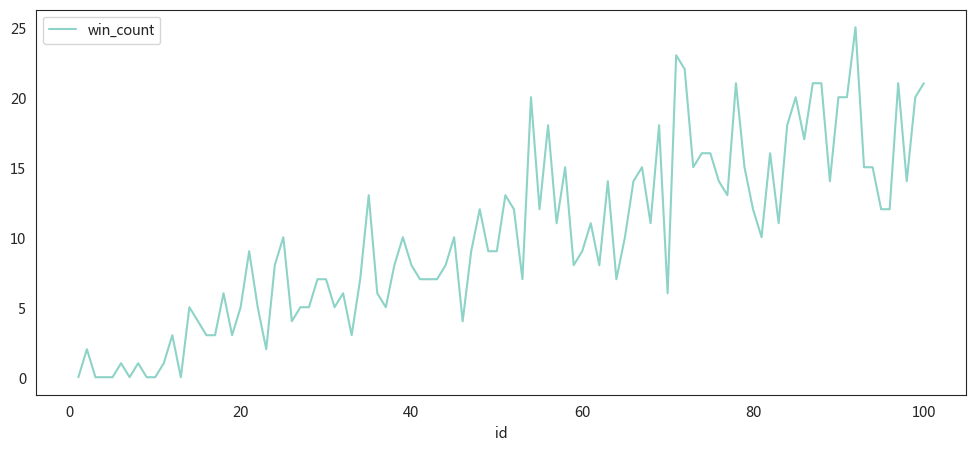

In [23]:
# 统计每个ID成为最后一个被淘汰的次数
last_killed = df_simul.iloc[:, 1:].idxmax()
last_killed_counts = {}
for i in range(1, len(df_simul )+1):
    last_killed_counts[i] = 0
# print(last_killed_counts.keys())
for i in df_simul.loc[df_simul.iloc[:, 1:].idxmax()]['id']:
    last_killed_counts[i] += 1
last_killed_counts = pd.DataFrame({
    'id': last_killed_counts.keys(),
    'win_count': last_killed_counts.values()
})

last_killed_counts.plot(x='id',y='win_count',figsize=(12,5))

In [24]:
last_killed_counts.sort_values('win_count',ascending=False)

,id,win_count
91,92,25
70,71,23
71,72,22
99,100,21
87,88,21
...,...,...
6,7,0
4,5,0
3,4,0
2,3,0


In [25]:
df_simul['average_alive_turns'] = df_simul.T.mean()
df_simul[['id', 'average_alive_turns']].sort_values(by='average_alive_turns',
                                                    ascending=False)

,id,average_alive_turns
1,2,57.129870
3,4,54.033966
9,10,53.224775
11,12,53.204795
7,8,52.812188
...,...,...
10,11,47.536464
8,9,46.769231
4,5,43.889111
2,3,42.407592


<AxesSubplot:xlabel='id'>

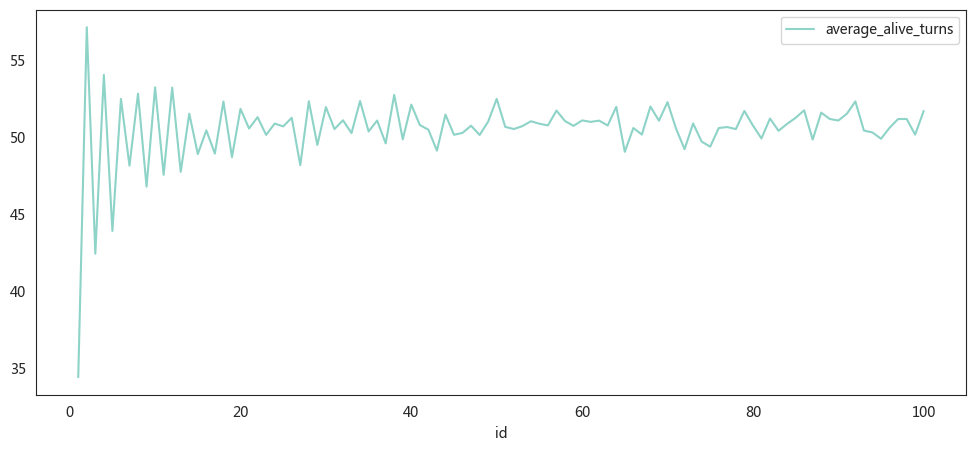

In [26]:
df_simul[['id', 'average_alive_turns']].plot(x='id',y='average_alive_turns',figsize=(12,5))